In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import openpyxl

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/지진공모전/earthquake.xls')
df_gb = pd.read_excel('/content/drive/MyDrive/지진공모전/df_gb.xlsx')
#ground = pd.read_excel('/content/drive/MyDrive/지진공모전/groundwater_data.xlsx')
people = pd.read_excel('/content/drive/MyDrive/지진공모전/region_people.xlsx')
fault = pd.read_excel('/content/drive/MyDrive/지진공모전/fault.xlsx')
rainy = pd.read_csv('/content/drive/MyDrive/지진공모전/rainy.csv', encoding='cp949')
ground_built = pd.read_excel('/content/drive/MyDrive/지진공모전/지하수개발실적.xlsx')

In [ ]:
#지진발생이력 데이터
df_gb.drop(columns={'Unnamed: 0','경도','위치'}, inplace=True)

In [ ]:
df_gb

,규모,깊이(km),최대진도,year,month,행정구,지역,지하수개발실적,단층갯수,day,...,합계강수량,구경,심도,평년수위,전년수위,현재수위,수위차,수위상태,지역특성,수위상승여부
0,2.4,13,Ⅲ,2025,5,경북,김천,0,22,19,...,0.0,216.67,116.17,103.84,103.16,102.80,-1.04,심각,내륙,하강
1,2.5,16,Ⅲ,2025,5,경북,경주,0,22,7,...,0.0,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강
2,2.0,15,Ⅱ,2025,5,경북,경주,0,22,7,...,0.0,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강
3,2.0,13,Ⅰ,2024,11,경북,영덕,117,22,3,...,0.0,200.00,96.00,58.35,58.34,58.28,-0.07,정상,내륙,상승
4,2.5,8,Ⅳ,2024,10,경북,칠곡,117,22,23,...,0.0,210.00,94.40,78.09,77.32,77.12,-0.97,정상,내륙,하강
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,NaN,Ⅱ,1995,12,경북,상주,0,22,21,...,0.0,285.71,79.43,137.59,137.52,137.50,-0.09,정상,내륙,상승
635,2.9,NaN,Ⅱ,1995,10,경북,울진,0,22,3,...,0.0,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강
636,2.2,NaN,Ⅱ,1995,6,경북,울진,0,22,24,...,84.0,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강
637,2.6,NaN,Ⅱ,1995,6,경북,울진,0,22,24,...,84.0,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강


In [ ]:
df_gb.describe()

,규모,year,month,지하수개발실적,단층갯수,day,hour,인구수,장마일수,강수일수,합계강수량,구경,심도,평년수위,전년수위,현재수위,수위차
count,639.000000,639.000000,639.000000,639.000000,639.0,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,2.467606,2013.942097,7.553991,104.652582,22.0,15.397496,12.140845,236938.550861,0.843505,0.431925,7.662128,233.101440,82.968448,83.140448,82.467328,82.098288,-1.042144
std,0.494895,6.331349,3.336858,39.081116,0.0,7.686147,7.303896,168154.892665,4.937914,2.593333,49.630623,23.261381,21.971392,43.950550,43.651703,44.318875,1.391461
min,2.000000,1995.000000,1.000000,0.000000,22.0,1.000000,0.000000,9001.000000,0.000000,0.000000,0.000000,200.000000,57.800000,33.190000,33.010000,32.700000,-6.020000
25%,2.100000,2012.000000,5.000000,80.500000,22.0,11.000000,5.000000,66382.000000,0.000000,0.000000,0.000000,216.670000,57.800000,50.230000,49.690000,49.410000,-0.820000
50%,2.300000,2016.000000,9.000000,100.000000,22.0,15.000000,13.000000,244495.000000,0.000000,0.000000,0.000000,230.000000,78.600000,87.470000,86.510000,86.790000,-0.680000
75%,2.600000,2017.000000,10.000000,103.000000,22.0,21.000000,19.000000,403666.000000,0.000000,0.000000,0.000000,260.000000,96.000000,87.470000,86.510000,86.790000,-0.680000
max,5.800000,2025.000000,12.000000,300.000000,22.0,31.000000,23.000000,490140.000000,36.000000,26.000000,577.800000,285.710000,173.330000,328.960000,328.410000,328.220000,0.030000


In [ ]:
df.isnull().sum()

,0
발생시각,0
규모,0
깊이(km),742
최대진도,1473
위도,0
경도,0
위치,0


In [ ]:
#결측치 행 추출(깊이/최대진도)
df[df['깊이(km)'].isna()]
df[df['최대진도'].isna()]

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역
531,2019-01-02 07:20:29,2.8,12,NaN,41.30 N,129.21 E,북한 함경북도 길주 북북서쪽 40km 지역,2019,1,북한,함경북도
549,2018-11-19 03:34:49,2.1,19,NaN,36.42 N,127.30 E,대전 유성구 북서쪽 8km 지역,2018,11,대전,유성구
553,2018-10-25 05:53:46,2.3,16,NaN,35.76 N,129.19 E,경북 경주시 남남서쪽 9km 지역,2018,10,경북,경주시
579,2018-07-04 04:39:40,2.1,10,NaN,37.30 N,127.70 E,경기 여주시 동쪽 6km 지역,2018,7,경기,여주시
580,2018-07-01 15:33:22,2.2,18,NaN,37.63 N,129.48 E,강원 삼척시 북동쪽 34km 해역,2018,7,강원,삼척시
...,...,...,...,...,...,...,...,...,...,...,...
2046,1995-02-05 12:59:56,2.6,NaN,NaN,39.60 N,126.00 E,북한 평안남도 개천 남동쪽 14km 지역,1995,2,북한,평안남도
2047,1995-02-02 15:56:30,2.5,NaN,NaN,38.90 N,126.00 E,북한 평양 동남동쪽 26km 지역,1995,2,북한,평양
2048,1995-01-29 17:02:58,2.4,NaN,NaN,38.90 N,126.00 E,북한 평양 동남동쪽 26km 지역,1995,1,북한,평양
2049,1995-01-21 07:39:59,3.3,NaN,NaN,34.20 N,125.00 E,전남 신안군 가거도 북서쪽 20km 해역,1995,1,전남,신안군


In [ ]:
#데이터 count
df['규모'].value_counts().sort_values(ascending=False).head(10)

,count
규모,
2.1,265
2.2,244
2.4,206
2.5,204
2.3,203
2.0,160
2.6,140
2.7,126
2.9,98


In [ ]:
df[df['규모']==5.4]

,발생시각,규모,깊이(km),최대진도,위도,경도,위치
742,2017-11-15 14:29:31,5.4,7,NaN,36.11 N,129.37 E,경북 포항시 북구 북쪽 8km 지역


In [ ]:
df['최대진도'].value_counts()

,count
최대진도,
Ⅰ,383
Ⅲ,79
Ⅱ,78
Ⅳ,28
Ⅴ,10


In [ ]:
#공백을 기준으로 위치 분할
import re #정규표현식 지원
df['location_split'] = df['위치'].apply(lambda x: re.split(" ", str(x))[:2]) #분할 후, 앞에 2개 요소만 가져오기

In [ ]:
df[['위치','location_split']].head(10)

,위치,location_split
0,북한 양강도 풍산 남동쪽 20km 지역,"[북한, 양강도]"
1,전남 신안군 흑산도 북서쪽 53km 해역,"[전남, 신안군]"
2,강원 고성군 동남동쪽 11km 해역,"[강원, 고성군]"
3,북한 평안남도 양덕 남동쪽 16km 지역,"[북한, 평안남도]"
4,울산 동구 동북동쪽 22km 해역,"[울산, 동구]"
5,북한 황해북도 송림 남남동쪽 13km 지역,"[북한, 황해북도]"
6,경북 김천시 동북동쪽 14km 지역,"[경북, 김천시]"
7,전남 신안군 흑산도 북서쪽 83km 해역,"[전남, 신안군]"
8,경기 연천군 북북동쪽 4km 지역,"[경기, 연천군]"
9,경기 연천군 북북동쪽 5km 지역,"[경기, 연천군]"


In [ ]:
#df['date_only'] = pd.to_datetime(df['발생시각']).dt.date #datetime은 년/월/일로만 구성
df['year'] = df['발생시각'].dt.year
df['month'] = df['발생시각'].dt.month

In [ ]:
#위치를 각 열로 분리
df[['행정구','지역']] = pd.DataFrame(df['location_split'].tolist(), index=df.index)
df.drop(columns='location_split', inplace=True)
df.head(5)

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역
0,2025-06-13 01:57:14,2.1,18,Ⅰ,40.67 N,128.29 E,북한 양강도 풍산 남동쪽 20km 지역,2025,6,북한,양강도
1,2025-06-12 21:49:16,2.7,19,Ⅰ,35.06 N,125.08 E,전남 신안군 흑산도 북서쪽 53km 해역,2025,6,전남,신안군
2,2025-06-10 23:53:28,2.2,13,Ⅲ,38.33 N,128.58 E,강원 고성군 동남동쪽 11km 해역,2025,6,강원,고성군
3,2025-06-07 03:25:17,2.2,-,Ⅰ,39.10 N,126.76 E,북한 평안남도 양덕 남동쪽 16km 지역,2025,6,북한,평안남도
4,2025-05-28 00:17:31,2.0,17,Ⅰ,35.55 N,129.65 E,울산 동구 동북동쪽 22km 해역,2025,5,울산,동구


In [ ]:
df[['행정구','지역']].value_counts().reset_index()

,행정구,지역,count
0,경북,경주시,231
1,경북,포항시,157
2,북한,황해북도,117
3,전남,신안군,99
4,북한,함경북도,89
...,...,...,...
148,전북,전주시,1
149,충남,홍성군,1
150,충남,태안군서격렬비도,1
151,충남,연기군,1


In [ ]:
#연도별/월별 발생 이력
df['year'].value_counts().sort_index().reset_index()

,year,count
0,1995,29
1,1996,39
2,1997,21
3,1998,32
4,1999,37
5,2000,29
6,2001,41
7,2002,49
8,2003,38
9,2004,42


In [ ]:
df[['year','month']].value_counts().sort_index().reset_index().describe()

,year,month,count
count,349.000000,349.000000,349.000000
mean,2010.097421,6.418338,5.876791
std,8.808415,3.441182,9.179829
min,1995.000000,1.000000,1.000000
25%,2003.000000,3.000000,3.000000
50%,2010.000000,6.000000,4.000000
75%,2018.000000,9.000000,7.000000
max,2025.000000,12.000000,142.000000


In [ ]:
#장마데이터
rainy['시작일'] = pd.to_datetime(rainy['시작일'], format='%Y.%m.%d')
rainy['year'] = rainy['시작일'].dt.year
rainy['month'] = rainy['시작일'].dt.month
#rainy.drop(columns=['start_month'], inplace=True)

In [ ]:
rainy

,행정구,지역,시작일,종료일,장마일수,강수일수,합계강수량,year,month
0,경북,울진,1995-06-30,1995.7.27,28,14,84.0,1995,6
1,경북,안동,1995-06-30,1995.7.27,28,14,147.9,1995,6
2,경북,포항,1995-06-30,1995.7.27,28,15,116.9,1995,6
3,경북,봉화,1995-06-30,1995.7.27,28,15,177.5,1995,6
4,경북,영주,1995-06-30,1995.7.27,28,16,212.5,1995,6
...,...,...,...,...,...,...,...,...,...
1586,광주,광주,2021-07-03,2021.7.19,17,9,201.8,2021,7
1587,광주,광주,2022-06-23,2022.7.25,33,17,209.6,2022,6
1588,광주,광주,2023-06-25,2023.7.26,32,25,1102.5,2023,6
1589,광주,광주,2024-06-22,2024.7.27,36,23,392.8,2024,6


In [ ]:
rainy_gb = rainy[rainy['행정구']=='경북']
rainy_gb

,행정구,지역,시작일,종료일,장마일수,강수일수,합계강수량,year,month
0,경북,울진,1995-06-30,1995.7.27,28,14,84.0,1995,6
1,경북,안동,1995-06-30,1995.7.27,28,14,147.9,1995,6
2,경북,포항,1995-06-30,1995.7.27,28,15,116.9,1995,6
3,경북,봉화,1995-06-30,1995.7.27,28,15,177.5,1995,6
4,경북,영주,1995-06-30,1995.7.27,28,16,212.5,1995,6
...,...,...,...,...,...,...,...,...,...
295,경북,문경,2024-06-22,2024.7.27,36,22,541.8,2024,6
296,경북,영덕,2024-06-22,2024.7.27,36,17,175.4,2024,6
297,경북,의성,2024-06-22,2024.7.27,36,21,342.9,2024,6
298,경북,구미,2024-06-22,2024.7.27,36,20,351.4,2024,6


In [ ]:
rainy_gb['지역'].value_counts()

,count
지역,
울진,30
안동,30
포항,30
봉화,30
영주,30
문경,30
영덕,30
의성,30
구미,30


In [ ]:
#연도,행정구,지하수개발실적(melt함수로 가로의 데이터를 세로로 바꾸는 형태)
gb = ground_built.melt(id_vars='연도', var_name='행정구', value_name='지하수개발실적') #id_vars:id 변수
gb['지하수개발실적'] = pd.to_numeric(gb['지하수개발실적'], errors='coerce')
gb = gb.dropna() #결측값 행 제거

In [ ]:
gb = gb.rename(columns={'연도':'year'})
gb['지하수개발실적'] = gb['지하수개발실적'].astype(int)
gb['행정구'].value_counts().reset_index()

,행정구,count
0,강원,30
1,전남,30
2,충북,30
3,충남,30
4,전북,30
5,경남,30
6,경기,29
7,경북,29
8,제주,25


In [ ]:
#지진이력의 연도/행정구가 동일하면 지하수개발실적 옆에 붙이기
#merge함수는 두 df를 각 데이터에 존재하는 고유값을 기준으로 병합할때 사용
df_merged = df.merge(gb[['year','행정구','지하수개발실적']], on=['year','행정구'], how='left')
df_merged['지하수개발실적'] = df_merged['지하수개발실적'].fillna(0)
df_merged['지하수개발실적'] = df_merged['지하수개발실적'].astype(int)

In [ ]:
df_merged[['year','행정구','지하수개발실적']]

,year,행정구,지하수개발실적
0,2025,북한,0
1,2025,전남,0
2,2025,강원,0
3,2025,북한,0
4,2025,울산,0
...,...,...,...
2046,1995,북한,0
2047,1995,북한,0
2048,1995,북한,0
2049,1995,전남,57


In [ ]:
#지진발생이력 행정구/지역에 지진이 재발생할 확률
#데이터 안에 특수문자 날리기(띄어쓰기는 살리고), Series 전체를 바로 넘기면 오류남
#fault['단층지역'] = fault['구간'].apply(lambda x: re.sub(r"[^\uAC00-\uD7A30\s]", " ", str(x)))
#fault['최종지역'] = fault['단층지역'].apply(lambda x: re.split(" ", str(x))[:2])

In [ ]:
fault = pd.read_excel('/content/drive/MyDrive/지진공모전/fault.xlsx')
fault['연장(km)'] = fault['연장(km)'].astype(int)
fault = fault.replace({'지역':'북면'}, '울진군')

In [ ]:
fault_count = fault[['행정구','지역']].value_counts().reset_index()
fault_count = fault_count[fault_count['행정구']=='경북']
fault_count['지역'] = fault_count['지역'].apply(lambda x: x[:-1] if x.endswith(('군','시')) else x)
fault_count.rename(columns={'count':'단층수'}, inplace=True)
fault_count

,행정구,지역,단층수
2,경북,경주,5
3,경북,상주,3
4,경북,울진,3
10,경북,의성,2
11,경북,안동,2
24,경북,봉화,1
25,경북,문경,1
27,경북,영덕,1
28,경북,영천,1
29,경북,영주,1


In [ ]:
df_gb = df_gb.merge(fault_count[['행정구','지역','단층수']], on=['행정구','지역'], how='left')
df_gb

,Unnamed: 0,규모,깊이(km),최대진도,경도,위치,year,month,행정구,지역,...,구경,심도,평년수위,전년수위,현재수위,수위차,수위상태,지역특성,수위상승여부,단층수
0,0,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,...,216.67,116.17,103.84,103.16,102.80,-1.04,심각,내륙,하강,NaN
1,1,2.5,16,Ⅲ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,...,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강,5.0
2,2,2.0,15,Ⅱ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,...,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강,5.0
3,3,2.0,13,Ⅰ,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,...,200.00,96.00,58.35,58.34,58.28,-0.07,정상,내륙,상승,1.0
4,4,2.5,8,Ⅳ,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,...,210.00,94.40,78.09,77.32,77.12,-0.97,정상,내륙,하강,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,634,2.6,NaN,Ⅱ,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,...,285.71,79.43,137.59,137.52,137.50,-0.09,정상,내륙,상승,3.0
635,635,2.9,NaN,Ⅱ,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3.0
636,636,2.2,NaN,Ⅱ,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3.0
637,637,2.6,NaN,Ⅱ,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3.0


In [ ]:
df_gb['단층수'] = df_gb['단층수'].fillna(0)
df_gb['단층수'] = df_gb['단층수'].astype(int)

In [ ]:
df_gb.drop(columns={'Unnamed: 0','경도','단층갯수'},inplace=True)

In [ ]:
df_merged = df_merged.merge(fault_count[['행정구','count']], on=['행정구'], how='left')

In [ ]:
df_merged['count'] = df_merged['count'].fillna(0)

In [ ]:
df_merged['count'] = df_merged['count'].astype(int)
df_merged = df_merged.rename(columns={'count':'단층갯수'})
df_merged

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수
0,2025-06-13 01:57:14,2.1,18,Ⅰ,40.67 N,128.29 E,북한 양강도 풍산 남동쪽 20km 지역,2025,6,북한,양강도,0,1
1,2025-06-12 21:49:16,2.7,19,Ⅰ,35.06 N,125.08 E,전남 신안군 흑산도 북서쪽 53km 해역,2025,6,전남,신안군,0,1
2,2025-06-10 23:53:28,2.2,13,Ⅲ,38.33 N,128.58 E,강원 고성군 동남동쪽 11km 해역,2025,6,강원,고성군,0,36
3,2025-06-07 03:25:17,2.2,-,Ⅰ,39.10 N,126.76 E,북한 평안남도 양덕 남동쪽 16km 지역,2025,6,북한,평안남도,0,1
4,2025-05-28 00:17:31,2.0,17,Ⅰ,35.55 N,129.65 E,울산 동구 동북동쪽 22km 해역,2025,5,울산,동구,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1995-02-05 12:59:56,2.6,NaN,NaN,39.60 N,126.00 E,북한 평안남도 개천 남동쪽 14km 지역,1995,2,북한,평안남도,0,1
2047,1995-02-02 15:56:30,2.5,NaN,NaN,38.90 N,126.00 E,북한 평양 동남동쪽 26km 지역,1995,2,북한,평양,0,1
2048,1995-01-29 17:02:58,2.4,NaN,NaN,38.90 N,126.00 E,북한 평양 동남동쪽 26km 지역,1995,1,북한,평양,0,1
2049,1995-01-21 07:39:59,3.3,NaN,NaN,34.20 N,125.00 E,전남 신안군 가거도 북서쪽 20km 해역,1995,1,전남,신안군,57,1


In [ ]:
df_merged['지역'] = df_merged['지역'].apply(lambda x: x[:-1] if x.endswith(('군','시','도')) else x)
df_merged[df_merged['지역']=='광주']

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수
1190,2014-08-02 01:32:27,2.2,14,NaN,37.40 N,127.20 E,경기 광주시 서남서쪽 5km 지역,2014,8,경기,광주,38,5


In [ ]:
people = pd.read_excel('/content/drive/MyDrive/지진공모전/region_people.xlsx')
people['행정구역별'] = people['행정구역별'].replace({'서울특별시':'서울',
                                           '부산광역시':'부산',
                                           '대구광역시':'대구',
                                           '인천광역시':'인천',
                                           '광주광역시':'광주',
                                           '대전광역시':'대전',
                                           '울산광역시':'울산',
                                           '세종특별자치시':'세종',
                                           '경기도':'경기',
                                           '강원특별자치도':'강원',
                                           '충청북도':'충북',
                                           '충청남도':'충남',
                                           '전북특별자치도':'전북',
                                           '전라남도':'전남',
                                           '경상북도':'경북',
                                           '경상남도':'경남',
                                           '제주특별자치도':'제주'})

In [ ]:
people.rename(columns={'행정구역별':'행정구'}, inplace=True)
people.head()

,행정구,2025
0,서울,9339904
1,부산,3238541
2,대구,2334535
3,인천,3058301
4,광주,1446570


In [ ]:
#발생이력 연원일 추출
df_merged['day'] = df_merged['발생시각'].dt.day
df_merged['hour'] = df_merged['발생시각'].dt.hour
df_merged['day_week'] = df_merged['발생시각'].dt.day_name() #요일추출

In [ ]:
merged = df_merged.merge(people[['행정구','2025']], on=['행정구'])

merged = df_merged.merge(rainy[['year','month','행정구','지역','강수일수','합계강수량']], on=['year','month','행정구','지역'], how='left')

,행정구,2025
0,서울,9339904
1,부산,3238541
2,대구,2334535
3,인천,3058301
4,광주,1446570
5,대전,1465021
6,울산,1094165
7,세종,397631
8,경기,13948740
9,강원,1517186


In [ ]:
df_gyeong = df_merged[df_merged['행정구']=='경북']

In [ ]:
df_gyeong

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수,day,hour,day_week
6,2025-05-19 14:18:50,2.4,13,Ⅲ,36.18 N,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,22,19,14,Monday
10,2025-05-07 23:08:53,2.5,16,Ⅲ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,23,Wednesday
11,2025-05-07 19:55:07,2.0,15,Ⅱ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,19,Wednesday
48,2024-11-03 12:16:44,2.0,13,Ⅰ,36.46 N,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,22,3,12,Sunday
54,2024-10-23 17:56:17,2.5,8,Ⅳ,35.99 N,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,22,23,17,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,1995-12-21 08:25:27,2.6,NaN,NaN,36.60 N,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,22,21,8,Thursday
2028,1995-10-03 14:05:56,2.9,NaN,NaN,36.90 N,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,22,3,14,Tuesday
2036,1995-06-24 21:49:58,2.2,NaN,NaN,37.00 N,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,22,24,21,Saturday
2037,1995-06-24 19:47:40,2.6,NaN,NaN,36.80 N,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,22,24,19,Saturday


In [ ]:
people_gb = pd.read_excel('/content/drive/MyDrive/지진공모전/people.xlsx')

In [ ]:
people_gb['지역'] = people_gb['지역'].apply(lambda x: x[:-1] if x.endswith(('군','시')) else x)
people_gb

,행정구,지역,2025
0,경북,경주,244495
1,경북,포항,490140
2,경북,영덕,32996
3,경북,울진,46012
4,경북,김천,135076
5,경북,상주,91096
6,경북,안동,153859
7,경북,문경,66382
8,경북,예천,54169
9,경북,울릉,9001


In [ ]:
df_gyeong = df_gyeong.merge(people_gb[['행정구','지역','2025']], on=['행정구','지역'], how='left')
df_gyeong.rename(columns={'2025':'인구수'}, inplace=True)

In [ ]:
df_gyeong

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수,day,hour,day_week,인구수
0,2025-05-19 14:18:50,2.4,13,Ⅲ,36.18 N,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,22,19,14,Monday,135076
1,2025-05-07 23:08:53,2.5,16,Ⅲ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,23,Wednesday,244495
2,2025-05-07 19:55:07,2.0,15,Ⅱ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,19,Wednesday,244495
3,2024-11-03 12:16:44,2.0,13,Ⅰ,36.46 N,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,22,3,12,Sunday,32996
4,2024-10-23 17:56:17,2.5,8,Ⅳ,35.99 N,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,22,23,17,Wednesday,106143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1995-12-21 08:25:27,2.6,NaN,NaN,36.60 N,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,22,21,8,Thursday,91096
635,1995-10-03 14:05:56,2.9,NaN,NaN,36.90 N,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,22,3,14,Tuesday,46012
636,1995-06-24 21:49:58,2.2,NaN,NaN,37.00 N,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,22,24,21,Saturday,46012
637,1995-06-24 19:47:40,2.6,NaN,NaN,36.80 N,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,22,24,19,Saturday,46012


In [ ]:
km = df_gyeong[~df_gyeong['최대진도'].isnull()]

In [ ]:
nulling = df_gyeong['최대진도'].value_counts(dropna=False)
nulling

,count
최대진도,
NaN,541
Ⅰ,44
Ⅲ,27
Ⅱ,20
Ⅳ,6
Ⅴ,1


In [ ]:
2.1 ~ 3.9 = 최대진도 Ⅱ
4.0 이상 = 최대진도 Ⅴ

# 1. 범주별 평균 구하기
category_means = df.groupby('category')['sales'].mean()

# 2. sales 값이 있는 NULL category 행들 따로 분리
null_rows = df[df['category'].isnull() & df['sales'].notnull()]

# 3. 가장 비슷한 평균값 가진 category 찾기
def find_closest_category(value):
    return (category_means - value).abs().idxmin()

df.loc[null_rows.index, 'category'] = null_rows['sales'].apply(find_closest_category)

In [ ]:
df_gyeong.to_excel('df_gyeong.xlsx')

In [ ]:
#최대진도 중 null값을 평균 범주형 값으로 변경하기
mask_null = df_gyeong['최대진도'].isnull()
df_gyeong.loc[mask_null & (df_gyeong['규모'] >= 2.0) & (df_gyeong['규모'] <= 3.9), '최대진도'] = 'Ⅱ'
df_gyeong.loc[mask_null & (df_gyeong['규모'] >= 4.0), '최대진도'] = 'Ⅴ'

In [ ]:
df_gyeong

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수,day,hour,day_week,인구수
0,2025-05-19 14:18:50,2.4,13,Ⅲ,36.18 N,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,22,19,14,Monday,135076
1,2025-05-07 23:08:53,2.5,16,Ⅲ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,23,Wednesday,244495
2,2025-05-07 19:55:07,2.0,15,Ⅱ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,19,Wednesday,244495
3,2024-11-03 12:16:44,2.0,13,Ⅰ,36.46 N,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,22,3,12,Sunday,32996
4,2024-10-23 17:56:17,2.5,8,Ⅳ,35.99 N,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,22,23,17,Wednesday,106143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1995-12-21 08:25:27,2.6,NaN,Ⅱ,36.60 N,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,22,21,8,Thursday,91096
635,1995-10-03 14:05:56,2.9,NaN,Ⅱ,36.90 N,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,22,3,14,Tuesday,46012
636,1995-06-24 21:49:58,2.2,NaN,Ⅱ,37.00 N,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,22,24,21,Saturday,46012
637,1995-06-24 19:47:40,2.6,NaN,Ⅱ,36.80 N,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,22,24,19,Saturday,46012


In [ ]:
df_gyeong['최대진도'].value_counts()

,count
최대진도,
Ⅱ,551
Ⅰ,44
Ⅲ,27
Ⅴ,11
Ⅳ,6


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/지진공모전/df_gyeong_.xlsx')

In [ ]:
df

,Unnamed: 0,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수,day,hour,day_week,인구수
0,0,2025-05-19 14:18:50,2.4,13,Ⅲ,36.18 N,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,22,19,14,Monday,135076
1,1,2025-05-07 23:08:53,2.5,16,Ⅲ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,23,Wednesday,244495
2,2,2025-05-07 19:55:07,2.0,15,Ⅱ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,19,Wednesday,244495
3,3,2024-11-03 12:16:44,2.0,13,Ⅰ,36.46 N,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,22,3,12,Sunday,32996
4,4,2024-10-23 17:56:17,2.5,8,Ⅳ,35.99 N,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,22,23,17,Wednesday,106143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,634,1995-12-21 08:25:27,2.6,NaN,Ⅱ,36.60 N,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,22,21,8,Thursday,91096
635,635,1995-10-03 14:05:56,2.9,NaN,Ⅱ,36.90 N,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,22,3,14,Tuesday,46012
636,636,1995-06-24 21:49:58,2.2,NaN,Ⅱ,37.00 N,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,22,24,21,Saturday,46012
637,637,1995-06-24 19:47:40,2.6,NaN,Ⅱ,36.80 N,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,22,24,19,Saturday,46012


In [ ]:
df_result = df.merge(rainy_gb[['year','month','행정구','지역','장마일수','강수일수','합계강수량']], on=['year','month','행정구','지역'], how='left')

In [ ]:
df_result[['장마일수','강수일수','합계강수량']] = df_result[['장마일수','강수일수','합계강수량']].fillna(0)

In [ ]:
df_result.drop(columns={'Unnamed: 0', '발생시각','위도'}, inplace=True)

In [ ]:
#지하수 수위
ground_gb = ground[ground['시도']=='경상북도']
ground_gb['시군구'].value_counts()

,count
시군구,
의성군,12
상주시,9
구미시,8
문경시,8
안동시,8
경주시,8
영주시,7
성주군,7
봉화군,7


In [ ]:
japan = pd.read_excel('/content/drive/MyDrive/지진공모전/japan.xls')

In [ ]:
df_result

,규모,깊이(km),최대진도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수,day,hour,day_week,인구수,장마일수,강수일수,합계강수량
0,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,22,19,14,Monday,135076,0.0,0.0,0.0
1,2.5,16,Ⅲ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,23,Wednesday,244495,0.0,0.0,0.0
2,2.0,15,Ⅱ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,19,Wednesday,244495,0.0,0.0,0.0
3,2.0,13,Ⅰ,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,22,3,12,Sunday,32996,0.0,0.0,0.0
4,2.5,8,Ⅳ,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,22,23,17,Wednesday,106143,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,NaN,Ⅱ,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,22,21,8,Thursday,91096,0.0,0.0,0.0
635,2.9,NaN,Ⅱ,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,22,3,14,Tuesday,46012,0.0,0.0,0.0
636,2.2,NaN,Ⅱ,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,22,24,21,Saturday,46012,28.0,14.0,84.0
637,2.6,NaN,Ⅱ,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,22,24,19,Saturday,46012,28.0,14.0,84.0


In [ ]:
ground = pd.read_excel('/content/drive/MyDrive/지진공모전/ground.xlsx')

In [ ]:
#지하수수위현황
ground.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수위상태    115 non-null    object 
 1   충적/암반   115 non-null    object 
 2   지역특성    115 non-null    object 
 3   구경      115 non-null    int64  
 4   심도      115 non-null    int64  
 5   행정구     115 non-null    object 
 6   지역      115 non-null    object 
 7   평년수위    115 non-null    float64
 8   전년수위    115 non-null    float64
 9   현재수위    115 non-null    float64
 10  수위상승여부  114 non-null    object 
 11  수위차     115 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 10.9+ KB


In [ ]:
ground = ground[ground['시도']=='경상북도']
ground['시도'] = ground['시도'].replace('경상북도','경북') #데이터 값 변경

In [ ]:
ground['시군구'] = ground['시군구'].replace({'포항시 북구':'포항시', '포항시 남구':'포항시'})

In [ ]:
ground['시군구'] = ground['시군구'].apply(lambda x: x[:-1] if x.endswith(('군','시')) else x)
ground.rename(columns={'시도':'행정구','시군구':'지역'}, inplace=True)

In [ ]:
df_gb = df_result.merge(ground[['행정구','지역','수위상태','충적/암반','지역특성','구경','심도','평년수위','전년수위','현재수위','평년대비\n현재수위차(m)']], on=['행정구','지역'], how='left')
df_gb

,규모,깊이(km),최대진도,경도,위치,year,month,행정구,지역,지하수개발실적,...,합계강수량,수위상태,충적/암반,지역특성,구경,심도,평년수위,전년수위,현재수위,평년대비\n현재수위차(m)
0,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,심각,암반,내륙,200.0,185.0,40.47,40.00,39.85,-0.62 하강
1,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,심각,암반,내륙,250.0,81.0,52.47,51.52,51.41,-1.06 하강
2,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,정상,암반,내륙,200.0,100.0,94.78,93.45,92.19,-2.59 하강
3,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,심각,암반,내륙,250.0,81.0,77.54,77.11,75.68,-1.86 하강
4,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,정상,암반,내륙,200.0,150.0,138.28,138.28,138.64,0.36 상승
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,3.0,NaN,Ⅱ,128.20 E,경북 상주시 동남동쪽 4km 지역,1995,6,경북,상주,0,...,0.0,정상,암반,내륙,250.0,62.0,284.90,284.91,285.01,0.11 상승
4433,3.0,NaN,Ⅱ,128.20 E,경북 상주시 동남동쪽 4km 지역,1995,6,경북,상주,0,...,0.0,심각,암반,내륙,350.0,50.0,85.53,85.07,84.95,-0.58 하강
4434,3.0,NaN,Ⅱ,128.20 E,경북 상주시 동남동쪽 4km 지역,1995,6,경북,상주,0,...,0.0,심각,암반,내륙,350.0,40.0,81.79,81.55,81.45,-0.34 하강
4435,3.0,NaN,Ⅱ,128.20 E,경북 상주시 동남동쪽 4km 지역,1995,6,경북,상주,0,...,0.0,정상,암반,내륙,250.0,62.0,82.34,82.36,82.50,0.16 상승


In [ ]:
df_result.to_excel('df_result.xlsx')

In [ ]:
ground.to_excel('ground.xlsx')

In [ ]:
ground.rename(columns={'평년대비\n현재수위차(m)':'수위상승여부'}, inplace=True)

In [ ]:
ground['수위차'] = ground['수위상승여부'].str.extract(r'([-+]?\d*\.?\d+)').astype(float) #수치만 분리
ground['수위상승여부'] = ground['수위상승여부'].str.extract(r'(상승|하강)') #문자열만 extract

In [ ]:
#결측치 행 제거
ground.dropna(subset=['수위상승여부','수위차'], inplace=True)

In [ ]:
#수위상태, 지역특성, 수위상승여부와 같은 범주형 변수는 최빈도 기준으로 평균 구하기
#심도, 평년수위, 전년수위, 현재수위, 수위차는 평균값 계산

#수치형 평균
avg = ground.groupby(['행정구','지역'], as_index=False).mean(numeric_only=True)

#범주형 최빈도 값 구하기
def get_mode(series):
  return series.mode().iloc[0] if not series.mode().empty else None

#수위상태와 지역특성, 수위상승여부의 최빈값 구하기
mode = ground.groupby(['행정구','지역'], as_index=False).agg({'수위상태':get_mode,
                                                         '지역특성':get_mode,
                                                         '수위상승여부':get_mode})

In [ ]:
df_ground = pd.merge(avg, mode, on=['행정구','지역'], how='left')
df_ground.head()

,행정구,지역,구경,심도,평년수위,전년수위,현재수위,수위차,수위상태,지역특성,수위상승여부
0,경북,경산,200.000000,100.000000,174.102500,170.865000,170.567500,-3.535000,정상,내륙,하강
1,경북,경주,230.000000,78.600000,87.466000,86.508000,86.786000,-0.680000,정상,내륙,하강
2,경북,고령,200.000000,100.000000,33.193333,33.010000,32.696667,-0.496667,정상,내륙,하강
3,경북,구미,250.000000,83.166667,39.096667,36.603333,36.495000,-2.601667,정상,내륙,하강
4,경북,김천,216.666667,116.166667,103.835000,103.161667,102.796667,-1.038333,심각,내륙,하강


In [ ]:
df_gb = df_result.merge(df_ground[['행정구','지역','구경','심도','평년수위','전년수위','현재수위','수위차','수위상태','지역특성','수위상승여부']], on=['행정구','지역'], how='left')
depth = ['구경','심도','평년수위','전년수위','현재수위','수위차']
depth

['구경', '심도', '평년수위', '전년수위', '현재수위', '수위차']

In [ ]:
#한번에 여러 개 열의 소수점 2자리까지만 출력하기
depth = ['구경','심도','평년수위','전년수위','현재수위','수위차']
df_gb[depth] = df_gb[depth].round(2)
df_gb

,규모,깊이(km),최대진도,경도,위치,year,month,행정구,지역,지하수개발실적,...,합계강수량,구경,심도,평년수위,전년수위,현재수위,수위차,수위상태,지역특성,수위상승여부
0,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,216.67,116.17,103.84,103.16,102.80,-1.04,심각,내륙,하강
1,2.5,16,Ⅲ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,...,0.0,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강
2,2.0,15,Ⅱ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,...,0.0,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강
3,2.0,13,Ⅰ,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,...,0.0,200.00,96.00,58.35,58.34,58.28,-0.07,정상,내륙,상승
4,2.5,8,Ⅳ,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,...,0.0,210.00,94.40,78.09,77.32,77.12,-0.97,정상,내륙,하강
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,NaN,Ⅱ,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,...,0.0,285.71,79.43,137.59,137.52,137.50,-0.09,정상,내륙,상승
635,2.9,NaN,Ⅱ,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,...,0.0,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강
636,2.2,NaN,Ⅱ,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,...,84.0,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강
637,2.6,NaN,Ⅱ,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,...,84.0,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강


In [ ]:
df_gb['깊이(km)'] = pd.to_numeric(df_gb['깊이(km)'], errors='coerce') #변환할 수 없는 데이터는 null 처리, 나머지는 숫자형 변환

In [ ]:
#규모, 지역을 조합한 '깊이' 결측값 대체하기
df_gb['깊이(km)'] = df_gb.groupby(['지역', '규모'])['깊이(km)'].transform(lambda x: x.fillna(x.mean()))
df_gb['깊이(km)'] = df_gb.groupby('지역')['깊이(km)'].transform(lambda x: x.fillna(x.mean()))
df_gb['깊이(km)'] = df_gb['깊이(km)'].fillna(df_gb['깊이(km)'].mean())

In [ ]:
df_gb[df_gb['구경'].isnull()]

,규모,깊이(km),최대진도,위치,year,month,행정구,지역,지하수개발실적,day,...,구경,심도,평년수위,전년수위,현재수위,수위차,수위상태,지역특성,수위상승여부,단층수
15,2.6,14.000000,Ⅰ,경북 울릉군 울릉도 서북서쪽 58km 해역,2023,8,경북,울릉,102,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
27,2.6,26.000000,Ⅰ,경북 울릉군 울릉도 북쪽 71km 해역,2022,6,경북,울릉,102,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
38,2.0,26.000000,Ⅰ,경북 울릉군 울릉도 남서쪽 76km 해역,2021,6,경북,울릉,70,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
95,2.5,26.000000,Ⅰ,경북 울릉군 울릉도 남서쪽 34km 해역,2018,8,경북,울릉,103,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
109,2.6,9.000000,Ⅱ,경북 울릉군 북서쪽 88km 해역,2018,3,경북,울릉,103,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
484,2.7,14.162615,Ⅱ,경북 군위군 서쪽 8km 지역,2012,5,경북,군위,172,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
562,2.4,20.200000,Ⅱ,경북 울릉군 북북서쪽 169km 해역,2005,2,경북,울릉,84,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
574,2.1,14.162615,Ⅱ,경북 군위군 동남동쪽 12km 지역,2003,3,경북,군위,104,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
608,3.1,20.200000,Ⅱ,경북 울릉군 울릉도 북서쪽 43km 해역,1999,5,경북,울릉,147,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
610,3.0,20.200000,Ⅱ,경북 울릉군 울릉도 서쪽 62km 해역,1999,3,경북,울릉,147,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df_gb['깊이(km)'] = df_gb['깊이(km)'].astype(int)

In [ ]:
df_gb[['구경','심도','평년수위','전년수위','현재수위','수위차']] = df_gb[['구경','심도','평년수위','전년수위','현재수위','수위차']].fillna(-1)
df_gb

,규모,깊이(km),최대진도,위치,year,month,행정구,지역,지하수개발실적,day,...,구경,심도,평년수위,전년수위,현재수위,수위차,수위상태,지역특성,수위상승여부,단층수
0,2.4,13,Ⅲ,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,19,...,216.67,116.17,103.84,103.16,102.80,-1.04,심각,내륙,하강,0
1,2.5,16,Ⅲ,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,7,...,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강,5
2,2.0,15,Ⅱ,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,7,...,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강,5
3,2.0,13,Ⅰ,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,3,...,200.00,96.00,58.35,58.34,58.28,-0.07,정상,내륙,상승,1
4,2.5,8,Ⅳ,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,23,...,210.00,94.40,78.09,77.32,77.12,-0.97,정상,내륙,하강,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,14,Ⅱ,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,21,...,285.71,79.43,137.59,137.52,137.50,-0.09,정상,내륙,상승,3
635,2.9,14,Ⅱ,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,3,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3
636,2.2,14,Ⅱ,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,24,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3
637,2.6,14,Ⅱ,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,24,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3


In [ ]:
#범주형 변수를 숫자로 변환(라벨인코딩, 원핫인코딩)
from sklearn.preprocessing import LabelEncoder

#라벨인코딩은 1차원으로 한 컬럼씩만 변환 가능, 이진분류일때
le = LabelEncoder()
df_gb['수위상승여부'] = le.fit_transform(df_gb['수위상승여부']) #1=하강, 0=상승

df_gb = pd.get_dummies(df_gb, columns=['최대진도'])

In [ ]:
df_gb['수위상태'] = le.fit_transform(df_gb['수위상태']) #0=심각, 1=정상
df_gb['지역특성'] = le.fit_transform(df_gb['지역특성']) #0=해안, 1=내륙

In [63]:
df_gb = pd.read_excel('/content/drive/MyDrive/지진공모전/df_gb.xlsx')

In [67]:
df_gb.drop(columns={'Unnamed: 0'}, inplace=True)

In [68]:
df_gb[['최대진도_Ⅰ','최대진도_Ⅱ','최대진도_Ⅲ','최대진도_Ⅳ','최대진도_Ⅴ']] = df_gb[['최대진도_Ⅰ','최대진도_Ⅱ','최대진도_Ⅲ','최대진도_Ⅳ','최대진도_Ⅴ']].astype(int)

In [69]:
#더미변수, 원핫인코딩 원복
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_gb['수위상태'] = df_gb['수위상태'].map({0:'심각', 1:'정상'})
df_gb['지역특성'] = df_gb['지역특성'].map({0:'해안', 1:'내륙'})
df_gb['수위상승여부'] = df_gb['수위상승여부'].map({0:'상승', 1:'하강'})

In [71]:
#dummy 컬럼 추출
dummy_cols = [col for col in df_gb.columns if col.startswith('최대진도_')]
df_gb['최대진도'] = df_gb[dummy_cols].idxmax(axis=1).str.replace('최대진도_', '')

df_gb

,규모,깊이(km),위치,year,month,행정구,지역,지하수개발실적,day,hour,...,수위상태,지역특성,수위상승여부,단층수,최대진도_Ⅰ,최대진도_Ⅱ,최대진도_Ⅲ,최대진도_Ⅳ,최대진도_Ⅴ,최대진도
0,2.4,13,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,19,14,...,심각,해안,하강,0,0,0,1,0,0,Ⅲ
1,2.5,16,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,7,23,...,정상,해안,하강,5,0,0,1,0,0,Ⅲ
2,2.0,15,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,7,19,...,정상,해안,하강,5,0,1,0,0,0,Ⅱ
3,2.0,13,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,3,12,...,정상,해안,상승,1,1,0,0,0,0,Ⅰ
4,2.5,8,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,23,17,...,정상,해안,하강,0,0,0,0,1,0,Ⅳ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,14,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,21,8,...,정상,해안,상승,3,0,1,0,0,0,Ⅱ
635,2.9,14,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,3,14,...,심각,내륙,하강,3,0,1,0,0,0,Ⅱ
636,2.2,14,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,24,21,...,심각,내륙,하강,3,0,1,0,0,0,Ⅱ
637,2.6,14,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,24,19,...,심각,내륙,하강,3,0,1,0,0,0,Ⅱ


In [73]:
df_gb.drop(columns=dummy_cols, inplace=True)

In [ ]:
map = df_gb[['규모','깊이(km)','지하수개발실적','month','hour','인구수','장마일수','강수일수','합계강수량','구경','심도','평년수위','전년수위','현재수위','수위차','수위상태','지역특성','수위상승여부','단층수','최대진도_Ⅰ','최대진도_Ⅱ',
             '최대진도_Ⅲ','최대진도_Ⅳ','최대진도_Ⅴ']]
map

,규모,깊이(km),지하수개발실적,month,hour,인구수,장마일수,강수일수,합계강수량,구경,...,수위차,수위상태,지역특성,수위상승여부,단층수,최대진도_Ⅰ,최대진도_Ⅱ,최대진도_Ⅲ,최대진도_Ⅳ,최대진도_Ⅴ
0,2.4,13,0,5,14,135076,0,0,0.0,216.67,...,-1.04,0,0,1,0,0,0,1,0,0
1,2.5,16,0,5,23,244495,0,0,0.0,230.00,...,-0.68,1,0,1,5,0,0,1,0,0
2,2.0,15,0,5,19,244495,0,0,0.0,230.00,...,-0.68,1,0,1,5,0,1,0,0,0
3,2.0,13,117,11,12,32996,0,0,0.0,200.00,...,-0.07,1,0,0,1,1,0,0,0,0
4,2.5,8,117,10,17,106143,0,0,0.0,210.00,...,-0.97,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,14,0,12,8,91096,0,0,0.0,285.71,...,-0.09,1,0,0,3,0,1,0,0,0
635,2.9,14,0,10,14,46012,0,0,0.0,200.00,...,-6.02,0,1,1,3,0,1,0,0,0
636,2.2,14,0,6,21,46012,28,14,84.0,200.00,...,-6.02,0,1,1,3,0,1,0,0,0
637,2.6,14,0,6,19,46012,28,14,84.0,200.00,...,-6.02,0,1,1,3,0,1,0,0,0


In [3]:
map_dx = pd.read_excel('/content/drive/MyDrive/지진공모전/map_dx.xlsx')

In [4]:
#폰트 설치
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname=r'/C:/Windows/Fonts/NanumGothic.ttf',
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.4 MB/s eta 0:00:00


In [6]:
map_dx.drop(columns={'Unnamed: 0'}, inplace=True)

In [9]:
map_dx.head()

,규모,깊이(km),지하수개발실적,month,hour,장마일수,강수일수,합계강수량,구경,심도,...,수위상태,지역특성,수위상승여부,단층수,최대진도_Ⅰ,최대진도_Ⅱ,최대진도_Ⅲ,최대진도_Ⅳ,최대진도_Ⅴ,log_인구수
0,2.4,13,0,5,14,0,0,0.0,216.67,116.17,...,0,0,1,0,0,0,1,0,0,11.813600
1,2.5,16,0,5,23,0,0,0.0,230.00,78.60,...,1,0,1,5,0,0,1,0,0,12.406954
2,2.0,15,0,5,19,0,0,0.0,230.00,78.60,...,1,0,1,5,0,1,0,0,0,12.406954
3,2.0,13,117,11,12,0,0,0.0,200.00,96.00,...,1,0,0,1,1,0,0,0,0,10.404172
4,2.5,8,117,10,17,0,0,0.0,210.00,94.40,...,1,0,1,0,0,0,0,1,0,11.572552


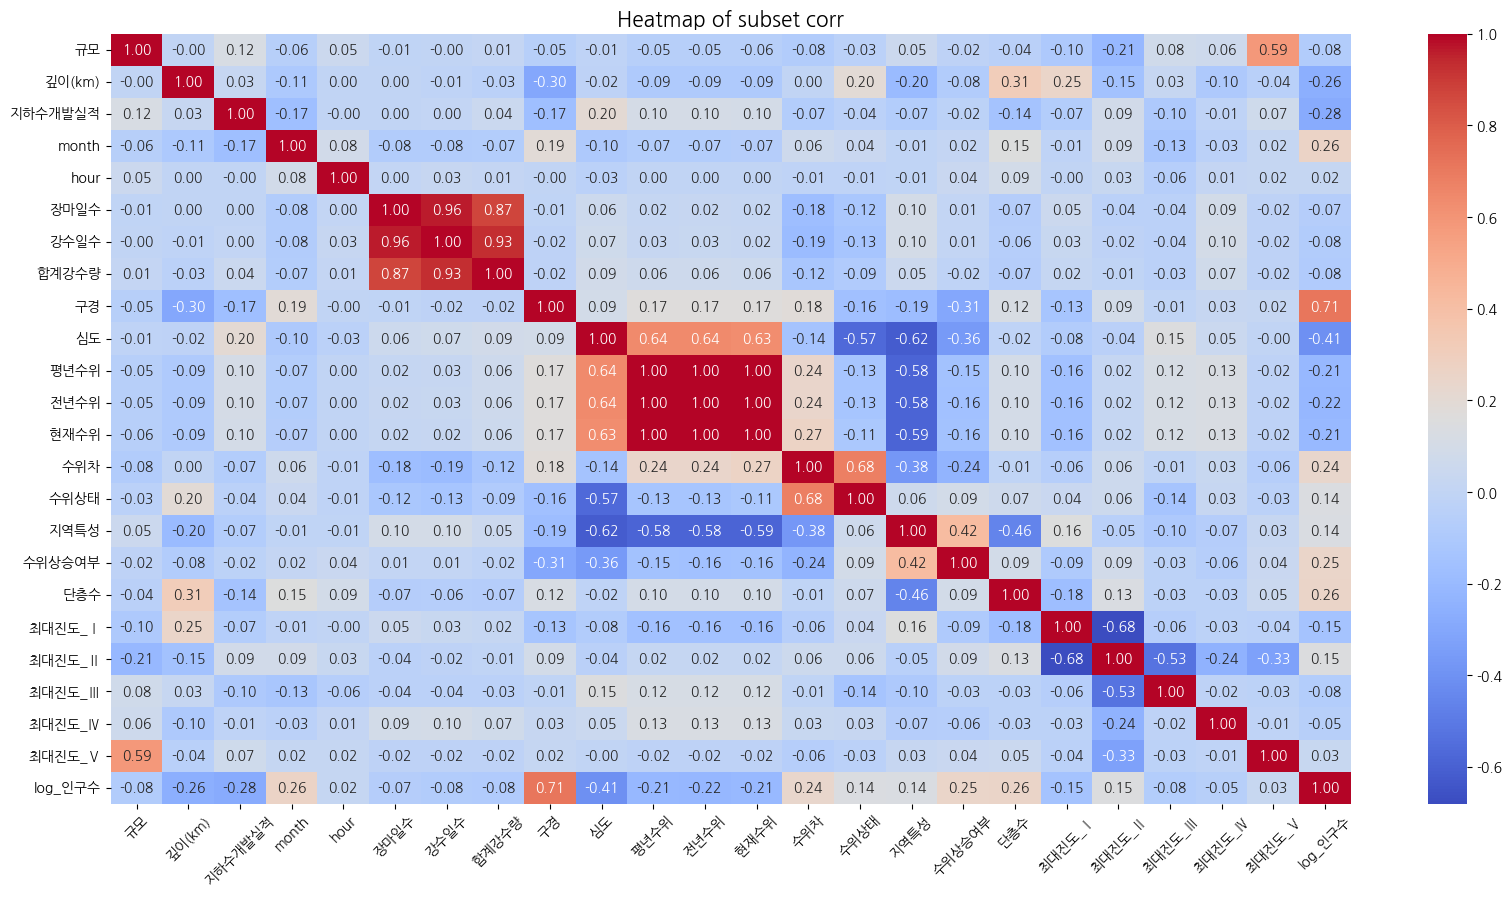

In [10]:
#seaborn을 이용한 heatmap 상관관계 파악
map = map_dx[['규모','깊이(km)','지하수개발실적','month','hour','장마일수','강수일수','합계강수량','구경','심도','평년수위','전년수위','현재수위','수위차','수위상태','지역특성','수위상승여부','단층수','최대진도_Ⅰ','최대진도_Ⅱ',
             '최대진도_Ⅲ','최대진도_Ⅳ','최대진도_Ⅴ','log_인구수']]
corr_matrix = map.corr()

# 현재 화면의 크기를 가져오기
plt.rc('font', family='NanumGothic')
fig, ax = plt.subplots(figsize=(20, 10))  # 적절한 값을 선택

# 히트맵 그리기
sns.heatmap(data=corr_matrix, cmap='coolwarm', cbar=True, annot=True, fmt='.2f', ax=ax)
plt.title('Heatmap of subset corr', fontsize=15)
plt.xticks(rotation=45)
plt.show()

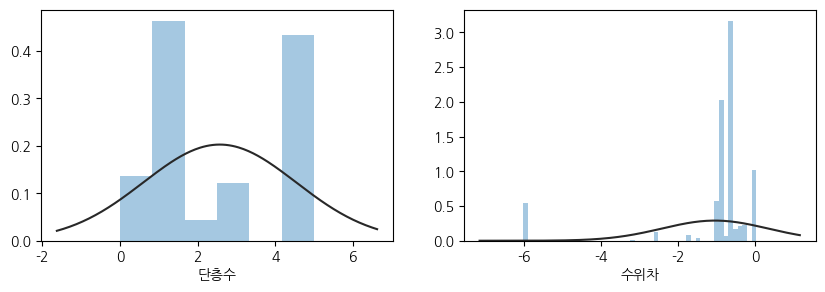

In [35]:
#데이터 분포
import scipy as sp
import scipy.stats

f,ax=plt.subplots(1,2, figsize=(10,3))

#정규분포
before= map['단층수']
sns.distplot(before, kde=False, rug=False, fit=sp.stats.norm, ax = ax[0])

before= map['수위차']
sns.distplot(before, kde=False, rug=False, fit=sp.stats.norm, ax = ax[1])
plt.show()

In [ ]:
#OLS regression을 통해 규모에 영향을 미치는 유의미한 변수 파악
import statsmodels.formula.api as smf

map.drop(columns=['intercept'], inplace=True)

In [ ]:
target = map_dx['규모']
x_data = map_dx.drop(['규모'], axis=1)

#상수항 추가
df_x_ = sm.add_constant(x_data, has_constant= "add")

#회귀모델 적합
model = sm.OLS(target, df_x_)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     규모   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     18.85
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           4.02e-55
Time:                        14:04:28   Log-Likelihood:                -292.23
No. Observations:                 639   AIC:                             630.5
Df Residuals:                     616   BIC:                             733.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9580      0.486      6.093      0.000       2.005       3.911
깊이(km)         0.0050      0.005      1.007      0.314      -0.005       0.015
지하수개발실적        0.0007      0.000      1.557      0.120      -0.000       0.002
month         -0.0030      0.005     -0.599      0.549      -0.013       0.007
hour           0.0040      0.002      1.868      0.062      -0.000       0.008
장마일수           0.0057      0.012      0.481      0.631      -0.018       0.029
강수일수          -0.0330      0.031     -1.078      0.282      -0.093       0.027
합계강수량          0.0013      0.001      1.418      0.157      -0.000       0.003
구경             0.0031      0.002      1.862      0.063      -0.000       0.006
심도            -0.0013      0.002     -0.765      0.444      -0.005       0.002
평년수위          -0.5484      0.407     -1.346      0.179      -1.348       0.252
전년수위          -0.0298      0.026     -1.128      0.260      -0.082       0.022
현재수위           0.5767      0.409      1.409      0.159      -0.227       1.380
수위차           -0.5984      0.417     -1.436      0.151      -1.417       0.220
수위상태          -0.0188      0.098     -0.191      0.849      -0.212       0.174
지역특성          -0.0605      0.088     -0.686      0.493      -0.234       0.113
수위상승여부        -0.0315      0.092     -0.342      0.733      -0.212       0.149
단층수           -0.0144      0.016     -0.909      0.364      -0.046       0.017
최대진도_Ⅰ        -0.1690      0.117     -1.445      0.149      -0.399       0.061
최대진도_Ⅱ         0.0708      0.104      0.679      0.497      -0.134       0.275
최대진도_Ⅲ         0.3063      0.120      2.557      0.011       0.071       0.542
최대진도_Ⅳ         0.4529      0.171      2.649      0.008       0.117       0.789
최대진도_Ⅴ         2.2970      0.144     15.905      0.000       2.013       2.581
log_인구수       -0.0995      0.058     -1.708      0.088      -0.214       0.015
==============================================================================
Omnibus:                      121.605   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.197
Skew:                           1.201   Prob(JB):                     9.16e-44
Kurtosis:                       4.295   Cond. No.                     1.41e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
map['log_인구수'] = np.log(map['인구수'] + 1)

In [24]:
map['log_인구수'] = np.log(map['인구수'] + 1)

,단층수
0,0
1,5
2,5
3,1
4,0
...,...
634,3
635,3
636,3
637,3


In [46]:
map_dx = pd.concat([map_dx, df_gb[['행정구','지역']].reset_index(drop=True)], axis=1)

In [77]:
map_dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   규모       639 non-null    float64
 1   깊이(km)   639 non-null    int64  
 2   지하수개발실적  639 non-null    int64  
 3   month    639 non-null    int64  
 4   hour     639 non-null    int64  
 5   장마일수     639 non-null    int64  
 6   강수일수     639 non-null    int64  
 7   합계강수량    639 non-null    float64
 8   구경       639 non-null    float64
 9   심도       639 non-null    float64
 10  평년수위     639 non-null    float64
 11  전년수위     639 non-null    float64
 12  현재수위     639 non-null    float64
 13  수위차      639 non-null    float64
 14  수위상태     639 non-null    int64  
 15  지역특성     639 non-null    int64  
 16  수위상승여부   639 non-null    int64  
 17  단층수      639 non-null    int64  
 18  최대진도_Ⅰ   639 non-null    int64  
 19  최대진도_Ⅱ   639 non-null    int64  
 20  최대진도_Ⅲ   639 non-null    int64  
 21  최대진도_Ⅳ   639 non

In [52]:
df_gb

,규모,깊이(km),위치,year,month,행정구,지역,지하수개발실적,day,hour,...,수위차,수위상태,지역특성,수위상승여부,단층수,최대진도_Ⅰ,최대진도_Ⅱ,최대진도_Ⅲ,최대진도_Ⅳ,최대진도_Ⅴ
0,2.4,13,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,19,14,...,-1.04,0,0,1,0,0,0,1,0,0
1,2.5,16,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,7,23,...,-0.68,1,0,1,5,0,0,1,0,0
2,2.0,15,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,7,19,...,-0.68,1,0,1,5,0,1,0,0,0
3,2.0,13,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,3,12,...,-0.07,1,0,0,1,1,0,0,0,0
4,2.5,8,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,23,17,...,-0.97,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,14,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,21,8,...,-0.09,1,0,0,3,0,1,0,0,0
635,2.9,14,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,3,14,...,-6.02,0,1,1,3,0,1,0,0,0
636,2.2,14,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,24,21,...,-6.02,0,1,1,3,0,1,0,0,0
637,2.6,14,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,24,19,...,-6.02,0,1,1,3,0,1,0,0,0


In [ ]:
#한쪽으로 치우친 변수 => 로그변환
장마일수
강수일수
합계강수량
구경
인구수

#정규분포에 가까운 변수 => 표준화
깊이
지하수개발실적
month
hour
심도
평년수위
전년수위
현재수위
단층수

#표준화 필요 없는 것들(라벨 인코딩, 더미변수)
수위상태
지역특성
수위상승여부
최대진도1
최대진도2
최대진도3
최대진도4
최대진도5

✅ 전략: Pseudo-target 기반 위험도 추정
1. 지역별 그룹핑 → 상대 지진 발생 빈도 추정
예: 포항은 639건 중 300건, 경주는 100건 → 상대적으로 포항의 "위험도"가 더 높음

2. 지역 + 환경 변수들을 조합해 "위험 점수 모델" 학습
종속변수를 직접 만들 수 없으므로, 발생 건수 또는 발생 비율을 타겟처럼 설정

예: 지역별 지진 발생률 = 지역 발생 건수 / 지역 내 총 샘플 수